# Project 2
#### By: David Hoffman and Kyle Kolodziej

In [1]:
import numpy as np 
import pandas as pd

# read in combined dataset into a dataframe
df = pd.read_csv("combined_data.csv") 

df.head(5)

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,english
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,9.0,1.0,0.0,0.0,2,2,2,2,2014,english
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,english
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,10.0,0.0,0.0,1.0,0,1,1,0,2014,english
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,english


The first of our datasets provides various game data from each of the top 5 soccer leagues in the world: The Premier League, Ligue, The Budesliga, Seria, and La Liga. This dataset contains data from games from 2014-2020 and includes many different game statistics such as each team's rating, the match excitement, team posession percentages, shots on goal, etc. To get this dataset into a pandas dataframe, we first had to download the dataset from kaggle. After this, the data was downloaded into our local environment in the form of a .zip file with several different files within it. We then exported all of the individual .csv files from the original .zip file and loaded the combined .csv into our original dataframe.

In [2]:
# read in second dataset into a dataframe
df2 = pd.read_csv("Football_Data.csv") 

df2.head(5)

,League,Year,position,Team,matches,wins,draws,loses,scored,pts,xG,xGA,%LoseR,%DrawR,Shots,Yellow,Red,Fouls,S_OnTarget
0,La_liga,2014,1,Barcelona,38,30,4,4,110,94,102.980152,28.444293,0.250000,0.714286,626.0,66.0,3.0,369.0,273.0
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,92,95.766243,42.607198,0.000000,0.607143,688.0,85.0,3.0,407.0,282.0
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,78,57.047670,29.069107,0.166667,0.261364,438.0,109.0,5.0,543.0,187.0
3,La_liga,2014,4,Valencia,38,22,11,5,70,77,55.062500,39.392572,0.250000,0.452381,439.0,101.0,9.0,566.0,159.0
4,La_liga,2014,5,Sevilla,38,23,7,8,71,76,69.526624,47.862742,0.166667,0.666667,455.0,115.0,2.0,604.0,181.0


Rather than showing game-to-game statistics, our second dataset gives year totals for each team in the five biggest soccer leagues in the world. This dataset contains information such as total matches, total wins, total losses, points scored, foul statistics, and different shooting statistics. Unlike the first dataset, this dataset only contains information for 2014-2018 missing data from the 2019 and 2020 season which is contained in the first dataset. We hope that this will not be a problem moving forward; however, if it does prove to be a problem we may need to inpute the values for the missing years or drop 2019 and 2020 from the first dataset altogether.

Questions we hope to answer after data exploration:

* What individual match factors are most correlated with match wins?
* What season statisitics are most correlate total match wins?
* Do expected goals for/against provide a direct correlation to a team's finishing position that year?

## 2. Data Inspection

In [3]:
# data types of first dataset attributes
df.dtypes

Unnamed: 0                         int64
Home Team                         object
Away Team                         object
Score                             object
Half Time Score                   object
Match Excitement                 float64
Home Team Rating                 float64
Away Team Rating                 float64
Home Team Possession %             int64
Away Team Possession %             int64
Home Team Off Target Shots       float64
Home Team On Target Shots        float64
Home Team Total Shots            float64
Home Team Blocked Shots          float64
Home Team Corners                float64
Home Team Throw Ins              float64
Home Team Pass Success %         float64
Home Team Aerials Won            float64
Home Team Clearances             float64
Home Team Fouls                  float64
Home Team Yellow Cards           float64
Home Team Second Yellow Cards    float64
Home Team Red Cards              float64
Away Team Off Target Shots       float64
Away Team On Tar

With the first dataset, nearly all the features are comprised of numerical data as many of them are totals for each statistical category throughout the game. Despite this, there are also several features that currently contain categorical data the obvious ones being the league and home/away team names. In addition, the final score and halftime score are also currently listed as strings and could be interpretted as categorical data or numerical data depending on the context. The string representation of the halftime and final scores are caused because the feature contains both the away and home team's goal total seperated by a hyphen. It may be beneficial to divide this feature into two features (home score and away score), but I believe that the total score representation also has merit because it shows the entire picture indicating the closeness of the game.

In [4]:
# data types of second dataset attributes
df2.dtypes

League         object
Year            int64
position        int64
Team           object
matches         int64
wins            int64
draws           int64
loses           int64
scored          int64
pts             int64
xG            float64
xGA           float64
%LoseR        float64
%DrawR        float64
Shots         float64
Yellow        float64
Red           float64
Fouls         float64
S_OnTarget    float64
dtype: object

Similarly to our first dataset, the second dataset contains mostly numerical data representing totals in each listed statistical category accross an entire season. Also similarly to our first dataset, the exception to this rule is the league and team name features which are categorical variables and represented as strings.

In [5]:
print("The first dataset contains",df.size,"elements and",df.shape[0],"rows.")

The first dataset contains 506604 elements and 12062 rows.


In [6]:
print("The second dataset contains",df2.size,"elements and",df2.shape[0],"rows.")

The second dataset contains 9310 elements and 490 rows.


In [7]:
# check for null values
df.isnull().sum()

Unnamed: 0                       0
Home Team                        0
Away Team                        0
Score                            0
Half Time Score                  0
Match Excitement                 0
Home Team Rating                 0
Away Team Rating                 0
Home Team Possession %           0
Away Team Possession %           0
Home Team Off Target Shots       0
Home Team On Target Shots        0
Home Team Total Shots            0
Home Team Blocked Shots          0
Home Team Corners                0
Home Team Throw Ins              0
Home Team Pass Success %         0
Home Team Aerials Won            0
Home Team Clearances             0
Home Team Fouls                  0
Home Team Yellow Cards           0
Home Team Second Yellow Cards    0
Home Team Red Cards              0
Away Team Off Target Shots       0
Away Team On Target Shots        0
Away Team Total Shots            0
Away Team Blocked Shots          0
Away Team Corners                0
Away Team Throw Ins 

In [8]:
# check for null values
df2.isnull().sum()

League        0
Year          0
position      0
Team          0
matches       0
wins          0
draws         0
loses         0
scored        0
pts           0
xG            0
xGA           0
%LoseR        6
%DrawR        6
Shots         6
Yellow        6
Red           6
Fouls         6
S_OnTarget    6
dtype: int64

In [136]:
# using this function, we can see that the "null" values are coming from the last several rows in the dataset
df_null = df2.isnull()
print (df_null)

     League   Year  position   Team  matches   wins  draws  loses  scored  \
0     False  False     False  False    False  False  False  False   False   
1     False  False     False  False    False  False  False  False   False   
2     False  False     False  False    False  False  False  False   False   
3     False  False     False  False    False  False  False  False   False   
4     False  False     False  False    False  False  False  False   False   
5     False  False     False  False    False  False  False  False   False   
6     False  False     False  False    False  False  False  False   False   
7     False  False     False  False    False  False  False  False   False   
8     False  False     False  False    False  False  False  False   False   
9     False  False     False  False    False  False  False  False   False   
10    False  False     False  False    False  False  False  False   False   
11    False  False     False  False    False  False  False  False   False   

In [137]:
# this function shows the last rows where we are seeing missing data
df2.tail(6)

,League,Year,position,Team,matches,wins,draws,loses,scored,pts,xG,xGA,%LoseR,%DrawR,Shots,Yellow,Red,Fouls,S_OnTarget
484,Bundesliga,2014,11,FC Cologne,34,9,13,12,34,40,32.224092,40.519774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,Bundesliga,2015,9,FC Cologne,34,10,13,11,38,43,42.872219,44.428846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,Bundesliga,2016,6,FC Cologne,34,12,13,9,51,49,45.335524,41.274053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,Bundesliga,2017,18,FC Cologne,34,5,7,22,35,22,41.500611,67.169223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,Bundesliga,2018,10,Fortuna Duesseldorf,34,13,5,16,49,44,49.474933,63.063520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,Serie_A,2018,16,Parma Calcio 1913,38,10,11,17,41,41,41.098644,64.981144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# imputes missing %LoseR values
position = 484

while position < 490:
    tempMatches = df2.at[position,"matches"]
    tempDraws = df2.at[position,"draws"]
    newNumber = tempDraws/tempMatches
    df2.at[position,"%DrawR"] = newNumber
    position+=1

In [139]:
# shows the newly inputed values
df2.tail(6)

,League,Year,position,Team,matches,wins,draws,loses,scored,pts,xG,xGA,%LoseR,%DrawR,Shots,Yellow,Red,Fouls,S_OnTarget
484,Bundesliga,2014,11,FC Cologne,34,9,13,12,34,40,32.224092,40.519774,NaN,0.382353,NaN,NaN,NaN,NaN,NaN
485,Bundesliga,2015,9,FC Cologne,34,10,13,11,38,43,42.872219,44.428846,NaN,0.382353,NaN,NaN,NaN,NaN,NaN
486,Bundesliga,2016,6,FC Cologne,34,12,13,9,51,49,45.335524,41.274053,NaN,0.382353,NaN,NaN,NaN,NaN,NaN
487,Bundesliga,2017,18,FC Cologne,34,5,7,22,35,22,41.500611,67.169223,NaN,0.205882,NaN,NaN,NaN,NaN,NaN
488,Bundesliga,2018,10,Fortuna Duesseldorf,34,13,5,16,49,44,49.474933,63.063520,NaN,0.147059,NaN,NaN,NaN,NaN,NaN
489,Serie_A,2018,16,Parma Calcio 1913,38,10,11,17,41,41,41.098644,64.981144,NaN,0.289474,NaN,NaN,NaN,NaN,NaN


From the isnull() functions above, we can see that our first dataset does not contain any missing or null values; however, our second dataset does have some missing values specifically within the last 6 rows and on the following features: %LoseR, %DrawR, Shots, Yellow, Red, Fouls, S_OnTarget. In the code sections following the isnull() function, I was able to impute the remaining values in both the %LoseR and %DrawR columns using the data on matches, loses, and draws in each respective row. This will help enhance the completeness of our final dataset and make our final model more accurate. The remaining missing values were not able to be simply imputed because there was no data on fouls or missed shots within each row.

## 3. Data Description

Let's start with the first dataset...

In [14]:
df.head(10)

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,english
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,9.0,1.0,0.0,0.0,2,2,2,2,2014,english
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,english
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,10.0,0.0,0.0,1.0,0,1,1,0,2014,english
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,english
5,5,STOKE,ASTON VILLA,0-1,0-0,2.8,6.5,7.0,63,37,...,9.0,3.0,0.0,0.0,0,1,1,0,2014,english
6,6,ARSENAL,CRYSTAL PALACE,2-1,1-1,5.8,7.7,5.6,76,24,...,19.0,3.0,1.0,0.0,2,1,1,2,2014,english
7,7,LIVERPOOL,SOUTHAMPTON,2-1,1-0,6.0,7.1,6.7,56,44,...,11.0,2.0,0.0,0.0,2,1,1,2,2014,english
8,8,NEWCASTLE,MAN CITY,0-2,0-1,4.6,5.5,8.1,44,56,...,11.0,5.0,0.0,0.0,0,2,2,0,2014,english
9,9,BURNLEY,CHELSEA,1-3,1-3,5.3,5.3,7.4,39,61,...,7.0,1.0,0.0,0.0,1,3,3,1,2014,english


In [11]:
# data types of first dataset attributes
df.dtypes

Unnamed: 0                         int64
Home Team                         object
Away Team                         object
Score                             object
Half Time Score                   object
Match Excitement                 float64
Home Team Rating                 float64
Away Team Rating                 float64
Home Team Possession %             int64
Away Team Possession %             int64
Home Team Off Target Shots       float64
Home Team On Target Shots        float64
Home Team Total Shots            float64
Home Team Blocked Shots          float64
Home Team Corners                float64
Home Team Throw Ins              float64
Home Team Pass Success %         float64
Home Team Aerials Won            float64
Home Team Clearances             float64
Home Team Fouls                  float64
Home Team Yellow Cards           float64
Home Team Second Yellow Cards    float64
Home Team Red Cards              float64
Away Team Off Target Shots       float64
Away Team On Tar

#### Attribute Information

* Unnamed: 0 : index
* Home Team: club name of team playing at home
* Away Team: club name of team playing on the road
* Score: final score of the game
* Match excitement: excitement rating of the match
    - Not entirely sure how they derived this. I am assuming a combination between attendance, crowd noise, and TV views
* Home team rating: match rating of the home team
* Away team rating: match rating of the away team
    - Team Rating note: I am assuming this is a calculated value of how well a team performed in a match
* Home team possession %: percent of the match the home team had possession of the ball
* Away team possession %: percent of the match the away team had possession of the ball
* Home Team Off Target Shots: number of shots off target for the home team
* Home Team On Target Shots: number of shots on target for the home team
* Home Team Total Shots: total number of shots for the home team
* Home Team Blocked Shots: number of blocked shots by the home team
* Home Team Corners: number of corners for the home team
* Home Team Throw Ins: number of throw ins for the home team
* Home Team Pass Success %: percent of successful passes for the home team
* Home Team Aerials Won: number of balls won in the air by the home team
* Home Team Clearances: number of balls cleared by the home team
* Home Team Fouls: number of fouls committed by the home team
* Home Team Yellow Cards: number of yellow cards for the home team
* Home Team Second Yellow Cards: number of times a second yellow card is given to a player
* Home Team Red Cards: number of red cards for the home team
* Away Team Off Target Shots: number of shots off target for the away team
* Away Team On Target Shots: number of shots on target for the away team
* Away Team Total Shots: total number of shots for the away team
* Away Team Blocked Shots: number of blocked shots by the away team
* Away Team Corners: number of corners for the away team
* Away Team Throw Ins: number of throw ins for the away team
* Away Team Pass Success %: percent of successful passes for the away team
* Away Team Aerials Won: number of balls won in the air by the away team
* Away Team Clearances: number of balls cleared by the away team
* Away Team Fouls: number of fouls committed by the away team
* Away Team Yellow Cards: number of yellow cards for the away team
* Away Team Second Yellow Cards: number of times a second yellow card is given to a player
* Away Team Red Cards: number of red cards for the away team
* Home Team Goals Scored: number of goals scored by the home team
* Away Team Goals Scored: number of goals scored by the away team
* Home Team Goals Conceeded: number of goals conceded by the home team
* Away Team Goals Conceeded: number of goals conceded by the away team
* year: year
* league: soccer league

Categorical variables:
* Home team
* Away team
* Score
* League

In [16]:
# Let's look at these numerical variables
df.describe()

,Unnamed: 0,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
count,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,...,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000
mean,6030.500000,5.391494,6.399702,6.142539,51.199469,48.800531,5.644338,4.723180,13.690764,3.338501,...,22.792323,13.083154,2.162245,0.060852,0.057785,1.531172,1.206351,1.206351,1.531172,2017.109352
std,3482.143808,1.719655,0.988037,0.992074,11.275257,11.275257,2.781520,2.559607,5.244448,2.246498,...,10.141781,4.205046,1.365581,0.244216,0.243772,1.305178,1.168266,1.168266,1.305178,1.965096
min,0.000000,1.400000,2.100000,1.300000,17.000000,16.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
25%,3015.250000,4.100000,5.700000,5.500000,43.000000,41.000000,4.000000,3.000000,10.000000,2.000000,...,15.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2015.000000
50%,6030.500000,5.300000,6.400000,6.100000,51.000000,49.000000,5.000000,4.000000,13.000000,3.000000,...,22.000000,13.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2017.000000
75%,9045.750000,6.400000,7.000000,6.800000,59.000000,57.000000,7.000000,6.000000,17.000000,5.000000,...,29.000000,16.000000,3.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2019.000000
max,12061.000000,10.000000,10.000000,10.000000,84.000000,83.000000,20.000000,18.000000,47.000000,19.000000,...,79.000000,32.000000,9.000000,2.000000,2.000000,10.000000,9.000000,9.000000,10.000000,2020.000000


Now let's look at the second data set...

In [19]:
df2.head(5)

,League,Year,position,Team,matches,wins,draws,loses,scored,pts,xG,xGA,%LoseR,%DrawR,Shots,Yellow,Red,Fouls,S_OnTarget
0,La_liga,2014,1,Barcelona,38,30,4,4,110,94,102.980152,28.444293,0.250000,0.714286,626.0,66.0,3.0,369.0,273.0
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,92,95.766243,42.607198,0.000000,0.607143,688.0,85.0,3.0,407.0,282.0
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,78,57.047670,29.069107,0.166667,0.261364,438.0,109.0,5.0,543.0,187.0
3,La_liga,2014,4,Valencia,38,22,11,5,70,77,55.062500,39.392572,0.250000,0.452381,439.0,101.0,9.0,566.0,159.0
4,La_liga,2014,5,Sevilla,38,23,7,8,71,76,69.526624,47.862742,0.166667,0.666667,455.0,115.0,2.0,604.0,181.0


In [18]:
df2.dtypes

League         object
Year            int64
position        int64
Team           object
matches         int64
wins            int64
draws           int64
loses           int64
scored          int64
pts             int64
xG            float64
xGA           float64
%LoseR        float64
%DrawR        float64
Shots         float64
Yellow        float64
Red           float64
Fouls         float64
S_OnTarget    float64
dtype: object

#### Attribute Information

* League: league
* Year: year
* position: finishing position in that league for that year
* Team: club name
* matches: matches played
* wins: wins
* draws: draws/ties
* loses: loses
* scored: goals for
* pts: points, 3 for a win and 1 for a draw
* xG: expected goals for
* xGA: expected goals against
* %LoseR: % games lost
* %DrawR: % games drawn
* Shots: shots
* Yellow: yellow cards
* Red: red cards
* Fouls: fouls committed
* S_OnTarget: shots on target

In [20]:
df2.describe()

,Year,position,matches,wins,draws,loses,scored,pts,xG,xGA,%LoseR,%DrawR,Shots,Yellow,Red,Fouls,S_OnTarget
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,2016.000000,10.316327,37.265306,13.965306,9.334694,13.965306,50.640816,51.230612,49.266015,49.266015,0.085450,0.323255,461.863636,75.743802,3.987603,488.258264,163.101240
std,1.415659,5.683537,1.550454,6.008925,2.957473,5.585259,17.409702,17.162578,13.843452,10.395048,0.116161,0.166336,80.305640,18.935558,2.420549,74.619403,38.412441
min,2014.000000,1.000000,34.000000,2.000000,2.000000,1.000000,22.000000,15.000000,26.527059,20.794377,0.000000,0.000000,281.000000,37.000000,0.000000,278.000000,94.000000
25%,2015.000000,5.000000,38.000000,10.000000,7.000000,10.000000,38.250000,39.000000,39.834251,42.673362,0.000000,0.206931,407.750000,62.000000,2.000000,433.000000,136.000000
50%,2016.000000,10.000000,38.000000,12.500000,9.000000,14.000000,47.000000,48.000000,46.184655,48.964268,0.055556,0.287500,445.000000,72.000000,4.000000,492.000000,154.000000
75%,2017.000000,15.000000,38.000000,17.000000,11.000000,18.000000,58.000000,61.000000,54.927071,55.741148,0.125000,0.430871,498.250000,90.000000,5.000000,541.000000,181.000000
max,2018.000000,20.000000,38.000000,32.000000,18.000000,29.000000,118.000000,100.000000,113.598270,78.863255,0.750000,0.916667,710.000000,133.000000,14.000000,678.000000,290.000000


## 4. Merge the Data

In [21]:
df.head(2)

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,english
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,9.0,1.0,0.0,0.0,2,2,2,2,2014,english


In [22]:
df2.head(2)

,League,Year,position,Team,matches,wins,draws,loses,scored,pts,xG,xGA,%LoseR,%DrawR,Shots,Yellow,Red,Fouls,S_OnTarget
0,La_liga,2014,1,Barcelona,38,30,4,4,110,94,102.980152,28.444293,0.25,0.714286,626.0,66.0,3.0,369.0,273.0
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,92,95.766243,42.607198,0.00,0.607143,688.0,85.0,3.0,407.0,282.0


For our model, thinking of needing to build a model that predicts the number of goals scored for both the home and away team. To accomplish this, we are going to build two seperate models:
* 1) Predict home team score
* 2) Predict away team score 

Following this process, our idea for merging is:
* 1) Copy 'df' into a home and away dataset
* 2) Copy 'df2' into two other datasets, called 'df2_<home/away>'
* 3) Rename the Team column to home or away team, respectively, of 'df2_<home/away>'
* 4) Change the values of Home/Away Team column to match with the syntax of the first dataset
    - example) Manchester United --> MAN UTD



In [38]:
teams = df['Home Team'].unique()

In [26]:
teams_df2 = df2['Team'].unique()

In [39]:
teams = np.sort(teams)

In [41]:
teams_df2 = np.sort(teams_df2)

In [44]:
teamsAcrossDatasets = {}
for t in teams_df2:
    temp = t
    t = t.upper()
    if t in teams:
        teamsAcrossDatasets[temp] = t
    else:
        teamsAcrossDatasets[temp] = "Need to find"

In [46]:
teamsAcrossDatasets

{'AC Milan': 'Need to find',
 'Alaves': 'Need to find',
 'Almeria': 'Need to find',
 'Amiens': 'AMIENS',
 'Angers': 'ANGERS',
 'Arsenal': 'ARSENAL',
 'Aston Villa': 'ASTON VILLA',
 'Atalanta': 'ATALANTA',
 'Athletic Club': 'Need to find',
 'Atletico Madrid': 'ATLETICO MADRID',
 'Augsburg': 'AUGSBURG',
 'Barcelona': 'BARCELONA',
 'Bayer Leverkusen': 'Need to find',
 'Bayern Munich': 'Need to find',
 'Benevento': 'BENEVENTO',
 'Bologna': 'BOLOGNA',
 'Bordeaux': 'BORDEAUX',
 'Borussia Dortmund': 'Need to find',
 'Borussia M.Gladbach': 'Need to find',
 'Bournemouth': 'BOURNEMOUTH',
 'Brighton': 'BRIGHTON',
 'Burnley': 'BURNLEY',
 'Caen': 'CAEN',
 'Cagliari': 'CAGLIARI',
 'Cardiff': 'CARDIFF',
 'Carpi': 'CARPI',
 'Celta Vigo': 'Need to find',
 'Cesena': 'CESENA',
 'Chelsea': 'CHELSEA',
 'Chievo': 'CHIEVO',
 'Cordoba': 'Need to find',
 'Crotone': 'CROTONE',
 'Crystal Palace': 'CRYSTAL PALACE',
 'Darmstadt': 'DARMSTADT',
 'Deportivo La Coruna': 'Need to find',
 'Dijon': 'DIJON',
 'Eibar': 'EI

In [50]:
teamsNeeded = [k for k,v in teamsAcrossDatasets.items() if v == 'Need to find']

In [52]:
# Imputed off of prior football knowledge and sources listed below
# For Evian Thonon Gaillard and THONON ÉVIAN: https://en.wikipedia.org/wiki/Thonon_Evian_Grand_Gen%C3%A8ve_F.C.
# For HSV and Hamburger SV: https://www.hsv.de/en/homepage
# For Lens and RC LENS: https://en.wikipedia.org/wiki/RC_Lens
# For Reims and STADE DE REIMS: https://en.wikipedia.org/wiki/Stade_de_Reims

otherTeams = ['MILAN','ALAVÉS', 'ALMERÍA', 'ATHLETIC', 'LEVERKUSEN','BAYERN','DORTMUND',"M'GLADBACH", 
              'CELTA', 'CÓRDOBA','DEPORTIVO','FRANKFURT','THONON ÉVIAN', '1. FC KÖLN', 'DÜSSELDORF',
              'HSV', 'HANNOVER', 'HERTHA', 'HULL CITY', 'LEGANÉS', 'LEICESTER CITY', 'RC LENS','MAINZ',
             'MÁLAGA', 'MAN CITY','MAN UTD','FC METZ','NEWCASTLE','NÜRNBERG','PSG','PARMA','QPR','RB LEIPZIG',
             'VALLADOLID', 'STADE DE REIMS', 'STADE RENNAIS', 'HUESCA', 'SPAL','SAINT-ÉTIENNE','SCHALKE','SEVILLA FC',
             'GIJÓN','HELLAS','STUTTGART','W. BREMEN','WEST BROM','WOLVES']

In [57]:
for i, t in enumerate(teamsNeeded):
    teamsAcrossDatasets[t] = otherTeams[i]

In [58]:
teamsAcrossDatasets

{'AC Milan': 'MILAN',
 'Alaves': 'ALAVÉS',
 'Almeria': 'ALMERÍA',
 'Amiens': 'AMIENS',
 'Angers': 'ANGERS',
 'Arsenal': 'ARSENAL',
 'Aston Villa': 'ASTON VILLA',
 'Atalanta': 'ATALANTA',
 'Athletic Club': 'ATHLETIC',
 'Atletico Madrid': 'ATLETICO MADRID',
 'Augsburg': 'AUGSBURG',
 'Barcelona': 'BARCELONA',
 'Bayer Leverkusen': 'LEVERKUSEN',
 'Bayern Munich': 'BAYERN',
 'Benevento': 'BENEVENTO',
 'Bologna': 'BOLOGNA',
 'Bordeaux': 'BORDEAUX',
 'Borussia Dortmund': 'DORTMUND',
 'Borussia M.Gladbach': "M'GLADBACH",
 'Bournemouth': 'BOURNEMOUTH',
 'Brighton': 'BRIGHTON',
 'Burnley': 'BURNLEY',
 'Caen': 'CAEN',
 'Cagliari': 'CAGLIARI',
 'Cardiff': 'CARDIFF',
 'Carpi': 'CARPI',
 'Celta Vigo': 'CELTA',
 'Cesena': 'CESENA',
 'Chelsea': 'CHELSEA',
 'Chievo': 'CHIEVO',
 'Cordoba': 'CÓRDOBA',
 'Crotone': 'CROTONE',
 'Crystal Palace': 'CRYSTAL PALACE',
 'Darmstadt': 'DARMSTADT',
 'Deportivo La Coruna': 'DEPORTIVO',
 'Dijon': 'DIJON',
 'Eibar': 'EIBAR',
 'Eintracht Frankfurt': 'FRANKFURT',
 'Elche'

In [70]:
df.rename(columns = {'year':'Year'}, inplace = True)
df_home = df.copy()
df_away = df.copy()

In [63]:
def convert_to_common_team_name(team):
    return teamsAcrossDatasets[team]

def transformDF2(df2):
    df2_home = df2.copy()
    df2_away = df2.copy()
    df2_home['Team'] = df2_home['Team'].apply(convert_to_common_team_name)
    df2_away['Team'] = df2_away['Team'].apply(convert_to_common_team_name)
    df2_home.rename(columns = {'Team':'Home Team'}, inplace = True)
    df2_away.rename(columns = {'Team':'Away Team'}, inplace = True)
    return df2_home, df2_away

In [64]:
df2_home, df2_away = transformDF2(df2)

In [131]:
aggData = pd.merge(df2_home, df_home, on=['Year', 'Home Team'], how='inner')
aggData.head()

,League,Year,position,Home Team,matches,wins,draws,loses,scored,pts,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,league
0,La_liga,2014,1,BARCELONA,38,30,4,4,110,94,...,17.0,13.0,1.0,0.0,0.0,3,0,0,3,spanish
1,La_liga,2014,1,BARCELONA,38,30,4,4,110,94,...,19.0,11.0,1.0,0.0,0.0,2,0,0,2,spanish
2,La_liga,2014,1,BARCELONA,38,30,4,4,110,94,...,26.0,11.0,3.0,0.0,0.0,6,0,0,6,spanish
3,La_liga,2014,1,BARCELONA,38,30,4,4,110,94,...,35.0,13.0,2.0,0.0,0.0,3,0,0,3,spanish
4,La_liga,2014,1,BARCELONA,38,30,4,4,110,94,...,30.0,29.0,2.0,0.0,0.0,0,1,1,0,spanish


In [84]:
len(aggData)

8516

In [87]:
aggData.iloc[8510]

League                           Serie_A
Year                                2018
position                              16
Home Team                          PARMA
matches                               38
wins                                  10
draws                                 11
loses                                 17
scored                                41
pts                                   41
xG                               41.0986
xGA                              64.9811
%LoseR                               NaN
%DrawR                               NaN
Shots                                NaN
Yellow                               NaN
Red                                  NaN
Fouls                                NaN
S_OnTarget                           NaN
Unnamed: 0                          8523
Away Team                          GENOA
Score                                1-0
Half Time Score                      0-0
Match Excitement                     3.6
Home Team Rating

In [83]:
aggData.iloc[1]

League                             La_liga
Year                                  2014
position                                 1
Home Team                        BARCELONA
matches                                 38
wins                                    30
draws                                    4
loses                                    4
scored                                 110
pts                                     94
xG                                  102.98
xGA                                28.4443
%LoseR                                0.25
%DrawR                            0.714286
Shots                                  626
Yellow                                  66
Red                                      3
Fouls                                  369
S_OnTarget                             273
Unnamed: 0                            9423
Away Team                         ATHLETIC
Score                                  2-0
Half Time Score                        0-0
Match Excit

The merge looks good!

From looking at this, columns can drop:

df: Goals conceded, Total Shots, Unnamed, league

## 5. Explore Bivariate Relationships

In [10]:
# Predict scores of 2019 and 2020
# Two models: one for home goals, one for away
# Eval on match winner, goal differential of match, accuracy of score



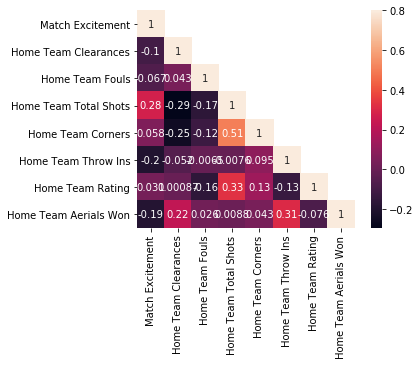

In [140]:
# correlation heat map giving correlation between single game statistics and overall match excitement
import seaborn as sn

corrMatt = aggData[["Match Excitement", "Home Team Clearances",
                    "Home Team Fouls", "Home Team Total Shots",
                    "Home Team Corners", "Home Team Throw Ins",
                    "Home Team Rating", "Home Team Aerials Won"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

The above correlation heatmap finds the correlation between numerous different individual match statistics and the overall excitement rating. In creating this correlation map, we used all of the home team statistics because most of the fans at any given game will likely be favoring the home team and we believed that the home team statistics would be an overall better predictor of match excitement. Unsurprisingly, the statistics with the biggest positive correlation with match excitement was total shots with both clearances and total throw-ins exhibiting a slight negative correlation with match excitement. Another correlation that logically makes sense was that total corners was heavily correlated with total shots because most corners are generated through shots that the goalie blocks out of bounds.

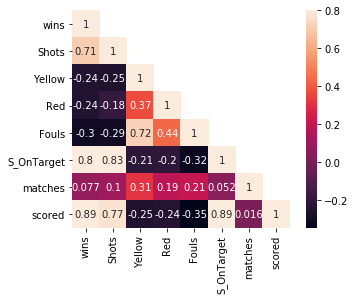

In [141]:
# correlation heat map giving correlation between season statistics and total wins

corrMatt = aggData[["wins","Shots",
                    "Yellow","Red",
                    "Fouls","S_OnTarget",
                    "matches", "scored"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

Based on the heatmap above, the number of goals scored by a team throughout the season seems to correlate most closely with the total number of wins by that team followed closely by the total number of shots taken. This makes sense as intuitively I would assume that goals and shots would create more of a difference in win percentage than other things such as yellow cards, red cards, or total fouls. I did find it interesting; however, that yellow cards, red cards, and total fouls did have a decently sized negative correlation with total wins indicating that these statistics did negatively impact total wins despite fouls being a critical and sometimes intentional part of the game.

In [142]:
# Get bottom teams
bottomTeams = aggData.where(aggData['position'] > 15)
bottomTeams = bottomTeams.dropna()

In [143]:
# Get top teams
topTeams = aggData.where(aggData['position'] <= 5)
topTeams = topTeams.dropna()

In [144]:
# displays avg of different season totals for teams in the top 15 vs bottom 5

print("Bottom 5 Team Averages:")
print("   Shots:",sum(bottomTeams["Shots"])/len(bottomTeams["Shots"]))
print("   Yellow Cards:",sum(bottomTeams["Yellow"])/len(bottomTeams["Yellow"]))
print("   Red Cards:",sum(bottomTeams["Red"])/len(bottomTeams["Red"]))
print("   Total Fouls:",sum(bottomTeams["Fouls"])/len(bottomTeams["Fouls"]))
print("   Shots on target:",sum(bottomTeams["S_OnTarget"])/len(bottomTeams["S_OnTarget"]))
print("   Total goals scored:",sum(bottomTeams["scored"])/len(bottomTeams["scored"]))

print("Top 5 Team Averages:")
print("   Shots:",sum(topTeams["Shots"])/len(topTeams["Shots"]))
print("   Yellow Cards:",sum(topTeams["Yellow"])/len(topTeams["Yellow"]))
print("   Red Cards:",sum(topTeams["Red"])/len(topTeams["Red"]))
print("   Total Fouls:",sum(topTeams["Fouls"])/len(topTeams["Fouls"]))
print("   Shots on target:",sum(topTeams["S_OnTarget"])/len(topTeams["S_OnTarget"]))
print("   Total goals scored:",sum(topTeams["scored"])/len(topTeams["scored"]))

Bottom 5 Team Averages:
   Shots: 410.5486111111111
   Yellow Cards: 83.01636904761905
   Red Cards: 4.838293650793651
   Total Fouls: 510.35515873015873
   Shots on target: 133.7470238095238
   Total goals scored: 35.7281746031746
Top 5 Team Averages:
   Shots: 544.600464037123
   Yellow Cards: 70.32621809744779
   Red Cards: 3.266357308584687
   Total Fouls: 454.6324825986079
   Shots on target: 207.51647331786543
   Total goals scored: 73.25197215777263


The output of the code above shows the statistical averages of teams that are placed within the top 5 teams in a league in any given year versus the teams that are in the bottom 5. The results of this experiment are not very surprising with the teams at the top experiencing more shots and goals scored while getting called for less fouls than the teams in the bottom of the league.

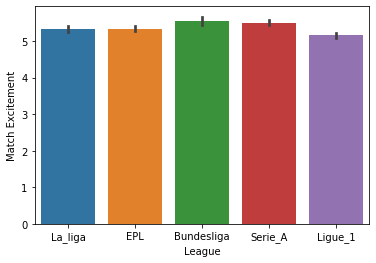

In [145]:
# bar chart comparing average match excitment accross the 5 major leagues

sn.barplot(data=aggData,x='League',y='Match Excitement')

The output of the code above is a barchart representing the different average match excitment levels amongst the top 5 soccer leagues in the world. The line at the top of each bar serves to present the level of uncertainty around each estimation. As you can see, Ligue 1 (the French soccer league) appears to have the lowest average match excitement amongst the top 5 leagues. This isn't surprising as the French league is generally considered to be the least competitive and generally worst league amongst the top 5. However, what is surprising is that the English Premier League (EPL) which is considered to be the most competive league in the top 5 has a lower average excitement than both the Bundesliga (German soccer league) and Serie A (Italian soccer league) which are both generally considered to be less competitive. Overall, all of the averages are very similar meaning we can't take too much from these results; however, I do still think that comparing the leagues in this way is interesting. Additionally, I would like to know more about how the match excitement statistic was created and hopefully this can give us more insight into why we are seeing the differences amongst each league that are displayed above.

Ultimate model plan:

*   Predict scores for 2019 and 2020 (target variables)
*   Will attempt to use both past season statistics as well as past single-game statistics as our predictor variables
*   Two models: one for home goals and one for away
*   Eval on accuracy of score, goal differential, and match winner

## 6. References

[1] Football Data : Top 5 Leagues. https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues

[2] Points Table: Top 5 Leagues. https://www.kaggle.com/thegreatcoder/points-table-of-5-leagues-in-football-20142018